In [1]:
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px

# statistics
from statsmodels.graphics.mosaicplot import mosaic

# H2O machine learning
import h2o
from h2o.estimators import H2ORandomForestEstimator

import os
df_example = pd.read_csv('C:\\Users\\hp\\OneDrive\\Desktop\\Network\\data.csv')
df_example.head()

avg_ipt  bytes_in  bytes_out  dest_ip  dest_port  entropy  num_pkts_out  \
0      0.0         0          0      786    31306.0      0.0             1   
1      0.0         0          0      786    24298.0      0.0             1   
2      0.0         0          0      786    31789.0      0.0             1   
3      0.0         0          0      786    29409.0      0.0             1   
4      0.0         0          0      786    60965.0      0.0             1   

   num_pkts_in  proto  src_ip  src_port          time_end        time_start  \
0            0      6     786   47613.0  1655074782132491  1655074782132491   
1            0      6     786   47613.0  1655074782573321  1655074782573321   
2            0      6     786   47613.0  1655074783148517  1655074783148517   
3            0      6     786   47613.0  1655074783149855  1655074783149855   
4            0      6     786   47613.0  1655074783167254  1655074783167254   

   total_entropy    label  duration  
0            0.0  outlier       0.0  
1            0.0  outlier       0.0  
2            0.0  outlier       0.0  
3            0.0  outlier       0.0  
4            0.0  outlier       0.0

In [2]:
df_example.shape

(26167, 16)

In [3]:
df_example.dest_port = df_example.dest_port.fillna(-1).astype('int64')
df_example.src_port = df_example.src_port.fillna(-1).astype('int64')

In [4]:
df_example.describe()

avg_ipt      bytes_in     bytes_out  dest_ip     dest_port  \
count  2.616700e+04  26167.000000  26167.000000  26167.0  26167.000000   
mean   1.193698e+07   1411.193947   1814.377689    786.0  14005.259143   
std    1.449286e+08   7101.222921   8124.052225      0.0  18868.278900   
min    0.000000e+00      0.000000      0.000000    786.0     -1.000000   
25%    0.000000e+00      0.000000      0.000000    786.0     -1.000000   
50%    0.000000e+00      8.000000      8.000000    786.0   5900.000000   
75%    4.357143e+01     34.000000     43.000000    786.0  22054.000000   
max    4.294967e+09  65331.000000  65508.000000    786.0  65531.000000   

            entropy  num_pkts_out   num_pkts_in         proto   src_ip  \
count  26167.000000  26167.000000  26167.000000  26167.000000  26167.0   
mean       3.068607      9.229908      8.409065      4.872817    786.0   
std        5.388380     30.882489     30.008276      3.060255      0.0   
min        0.000000      0.000000      0.000000      1.000000    786.0   
25%        0.000000      1.000000      0.000000      1.000000    786.0   
50%        2.750000      1.000000      1.000000      6.000000    786.0   
75%        3.000000      5.000000      4.000000      6.000000    786.0   
max       36.489082    255.000000    255.000000     47.000000    786.0   

           src_port      time_end    time_start  total_entropy      duration  
count  26167.000000  2.616700e+04  2.616700e+04   2.616700e+04  26167.000000  
mean   31156.706080  1.497365e+15  1.501791e+15   7.066839e+04      1.625840  
std    22768.978291  4.609972e+14  4.555349e+14   3.626780e+05      5.778718  
min       -1.000000  1.655076e+10  1.655072e+11   0.000000e+00      0.000000  
25%       -1.000000  1.655068e+15  1.655068e+15   0.000000e+00      0.000000  
50%    47613.000000  1.655071e+15  1.655071e+15   4.800000e+01      0.000098  
75%    47613.000000  1.655075e+15  1.655075e+15   2.280442e+02      0.361690  
max    65532.000000  1.655078e+15  1.655078e+15   3.482408e+06     34.600212

In [5]:
# init plot size
plt.rcParams['figure.figsize']=(7,4)

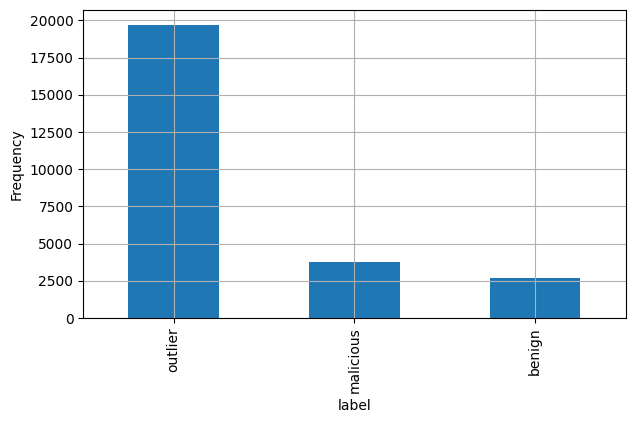

In [6]:
df_example.label.value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.grid()
plt.show()

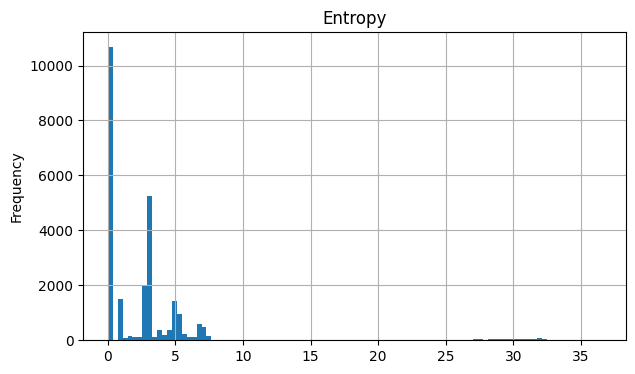

In [7]:
df_example.entropy.plot(kind='hist', bins=100)
plt.title('Entropy')
plt.grid()
plt.show()

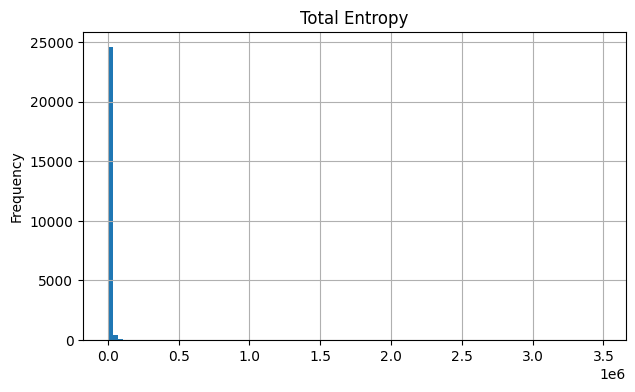

In [8]:
df_example.total_entropy.plot(kind='hist', bins=100)
plt.title('Total Entropy')
plt.grid()
plt.show()

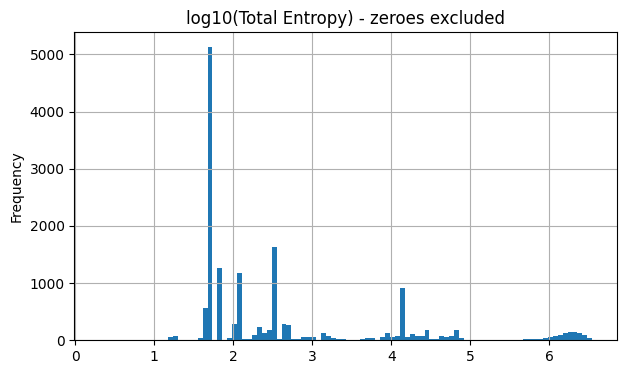

In [9]:
total_entropy_pos = df_example.total_entropy[df_example.total_entropy>0]
# show log plot
plt.hist(np.log10(total_entropy_pos),100)
plt.ylabel('Frequency')
plt.title('log10(Total Entropy) - zeroes excluded')
plt.grid()
plt.show()

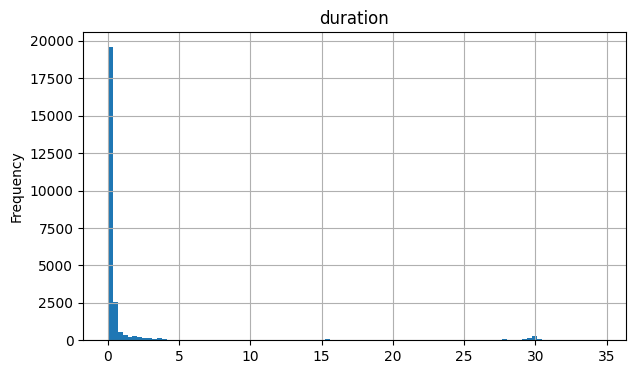

In [10]:
df_example.duration.plot(kind='hist', bins=100)
plt.title('duration')
plt.grid()
plt.show()

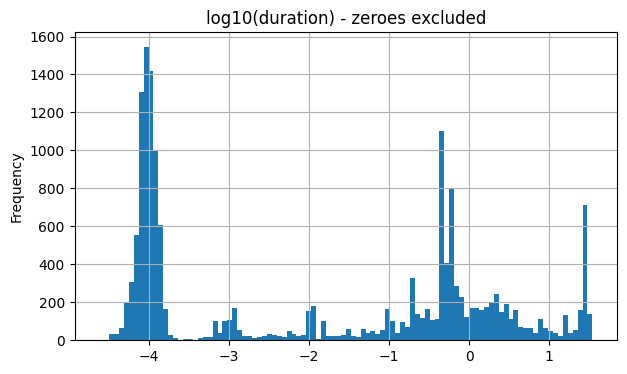

In [11]:
duration_pos = df_example.duration[df_example.duration>0]
# show log plot
plt.hist(np.log10(duration_pos),100)
plt.ylabel('Frequency')
plt.title('log10(duration) - zeroes excluded')
plt.grid()
plt.show()

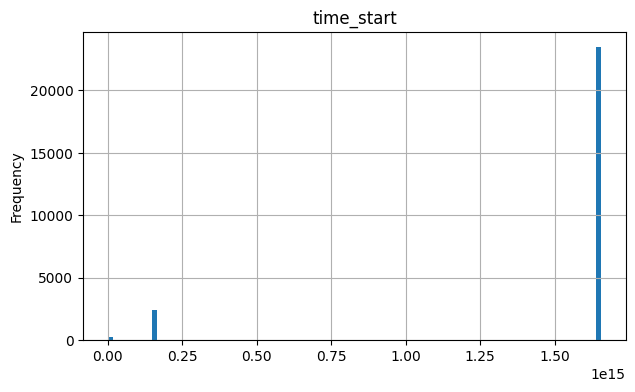

In [12]:
# start time of the flow in seconds since the epoch
df_example.time_start.plot(kind='hist', bins=100)
plt.title('time_start')
plt.grid()
plt.show()

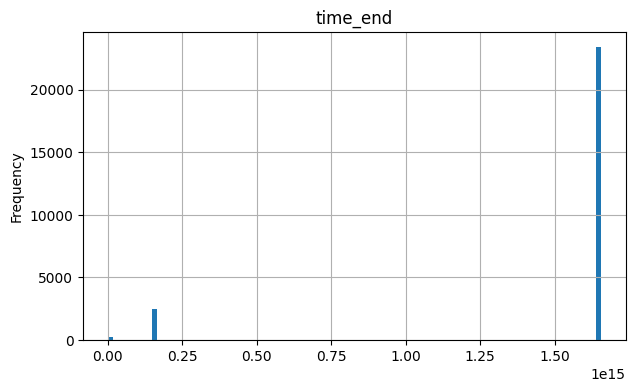

In [13]:
df_example.time_end.plot(kind='hist', bins=100)
plt.title('time_end')
plt.grid()
plt.show()

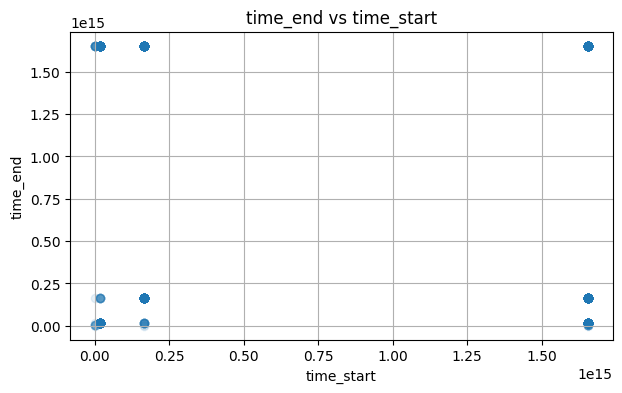

In [14]:
plt.scatter(df_example.time_start, df_example.time_end, alpha=0.1)
plt.xlabel('time_start')
plt.ylabel('time_end')
plt.title('time_end vs time_start')
plt.grid()
plt.show()

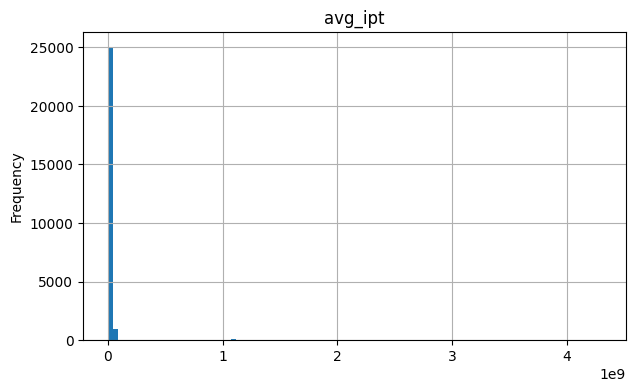

In [15]:
df_example.avg_ipt.plot(kind='hist', bins=100)
plt.title('avg_ipt')
plt.grid()
plt.show()

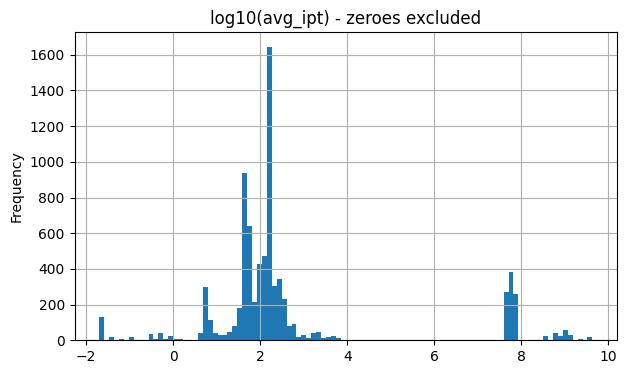

In [16]:
avg_ipt_pos = df_example.avg_ipt[df_example.avg_ipt>0]
# show log plot
plt.hist(np.log10(avg_ipt_pos),100)
plt.ylabel('Frequency')
plt.title('log10(avg_ipt) - zeroes excluded')
plt.grid()
plt.show()

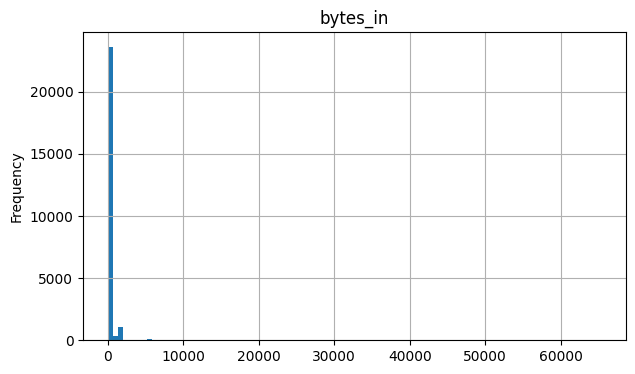

In [17]:
df_example.bytes_in.plot(kind='hist', bins=100)
plt.title('bytes_in')
plt.grid()
plt.show()

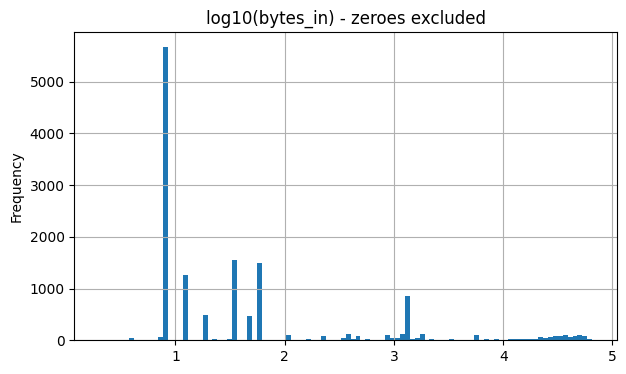

In [18]:
bytes_in_pos = df_example.bytes_in[df_example.bytes_in>0]
# show log plot
plt.hist(np.log10(bytes_in_pos),100)
plt.ylabel('Frequency')
plt.title('log10(bytes_in) - zeroes excluded')
plt.grid()
plt.show()

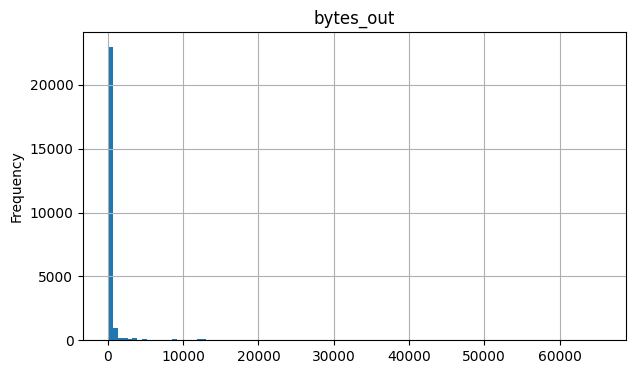

In [19]:
df_example.bytes_out.plot(kind='hist', bins=100)
plt.title('bytes_out')
plt.grid()
plt.show()

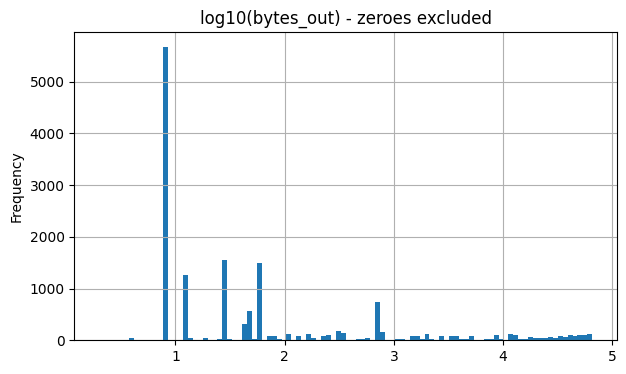

In [20]:
bytes_out_pos = df_example.bytes_out[df_example.bytes_out>0]
# show log plot
plt.hist(np.log10(bytes_out_pos),100)
plt.ylabel('Frequency')
plt.title('log10(bytes_out) - zeroes excluded')
plt.grid()
plt.show()

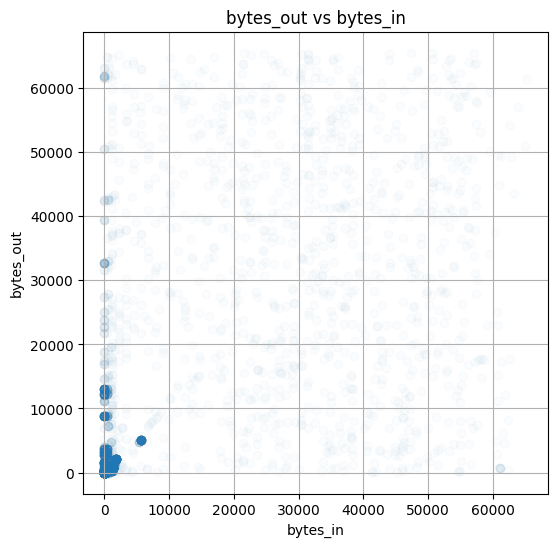

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(df_example.bytes_in, df_example.bytes_out, alpha=0.02)
plt.xlabel('bytes_in')
plt.ylabel('bytes_out')
plt.title('bytes_out vs bytes_in')
plt.grid()
plt.show()

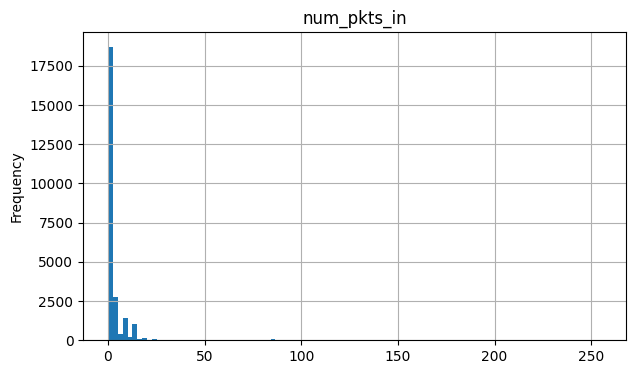

In [22]:
df_example.num_pkts_in.plot(kind='hist', bins=100)
plt.title('num_pkts_in')
plt.grid()
plt.show()

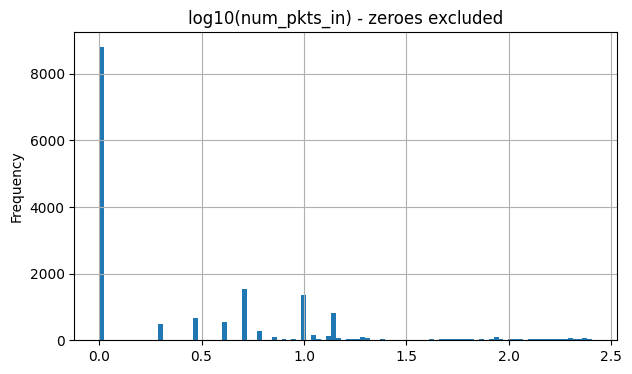

In [23]:
num_pkts_in_pos = df_example.num_pkts_in[df_example.num_pkts_in>0]
# show log plot
plt.hist(np.log10(num_pkts_in_pos),100)
plt.ylabel('Frequency')
plt.title('log10(num_pkts_in) - zeroes excluded')
plt.grid()
plt.show()

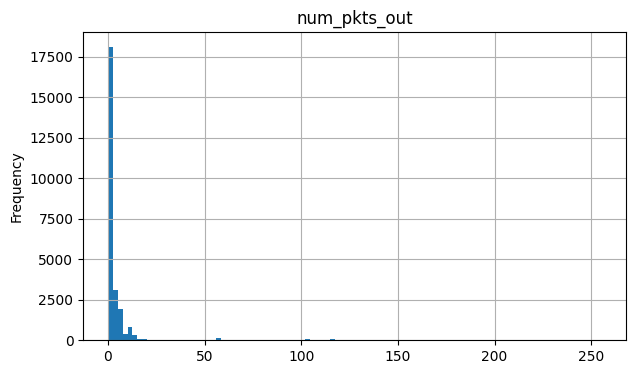

In [24]:
df_example.num_pkts_out.plot(kind='hist', bins=100)
plt.title('num_pkts_out')
plt.grid()
plt.show()

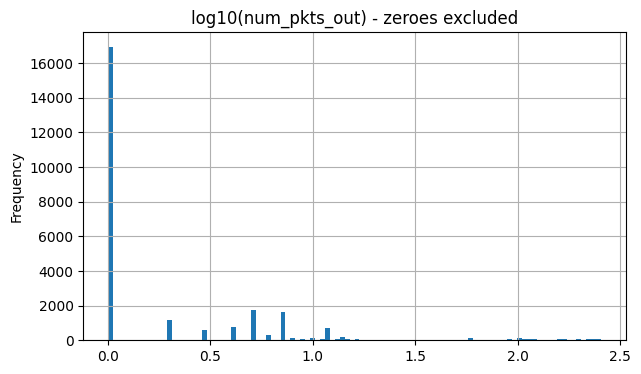

In [25]:
num_pkts_out_pos = df_example.num_pkts_out[df_example.num_pkts_out>0]
# show log plot
plt.hist(np.log10(num_pkts_out_pos),100)
plt.ylabel('Frequency')
plt.title('log10(num_pkts_out) - zeroes excluded')
plt.grid()
plt.show()

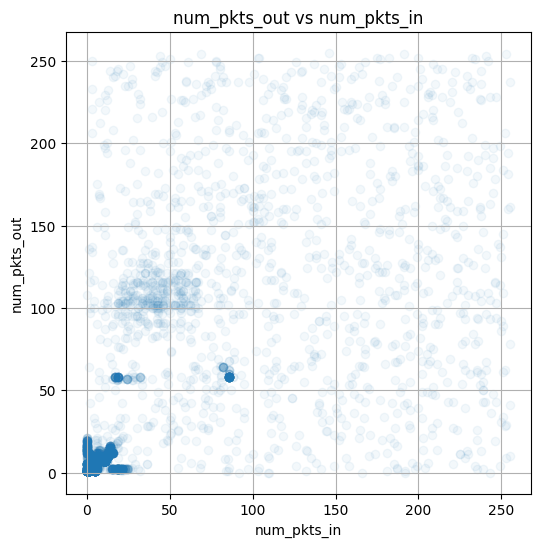

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(df_example.num_pkts_in, df_example.num_pkts_out, alpha=0.05)
plt.xlabel('num_pkts_in')
plt.ylabel('num_pkts_out')
plt.title('num_pkts_out vs num_pkts_in')
plt.grid()
plt.show()

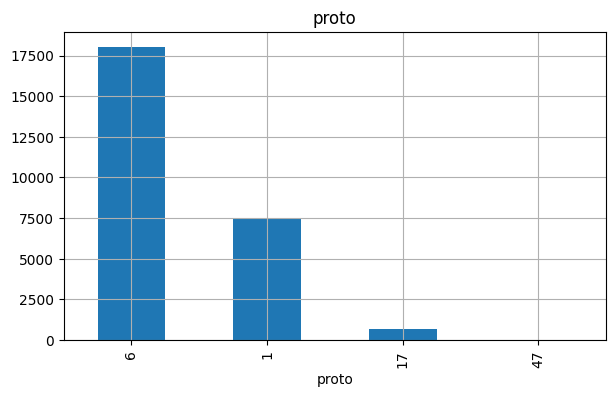

In [27]:
df_example.proto.value_counts().plot(kind='bar')
plt.title('proto')
plt.grid()
plt.show()

In [28]:
pd.crosstab(df_example.proto, df_example.label)

label  benign  malicious  outlier
proto                            
1           0       3748     3694
6        2579          0    15461
17        121          0      558
47          0          0        6

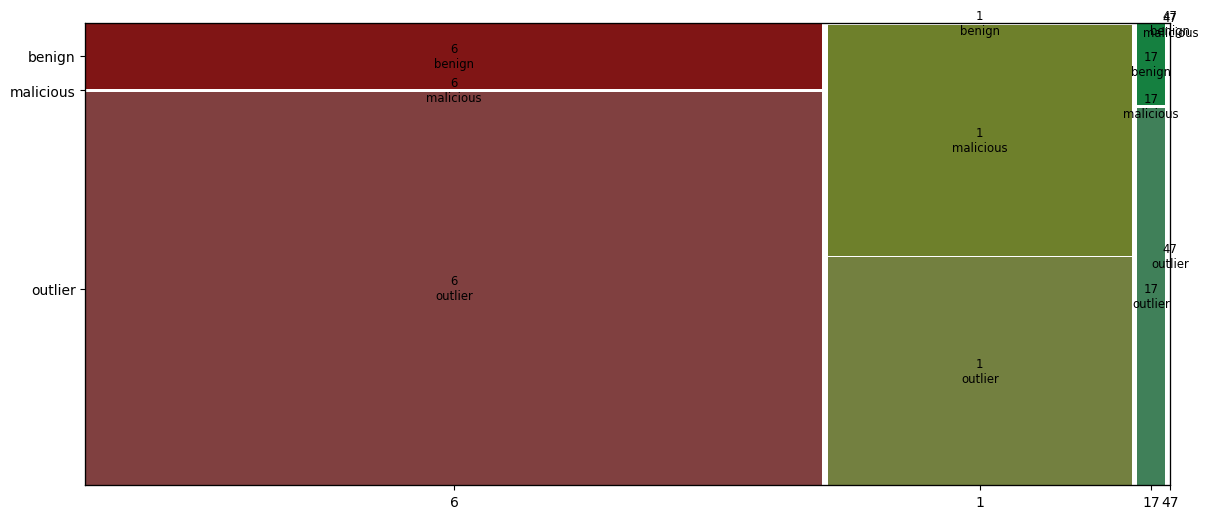

In [29]:
rcpar_save = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize']=(14,6)
mosaic(df_example, ['proto','label'])
plt.show()

plt.rcParams['figure.figsize'] = rcpar_save

In [30]:
df_example.src_ip.value_counts()

src_ip
786    26167
Name: count, dtype: int64

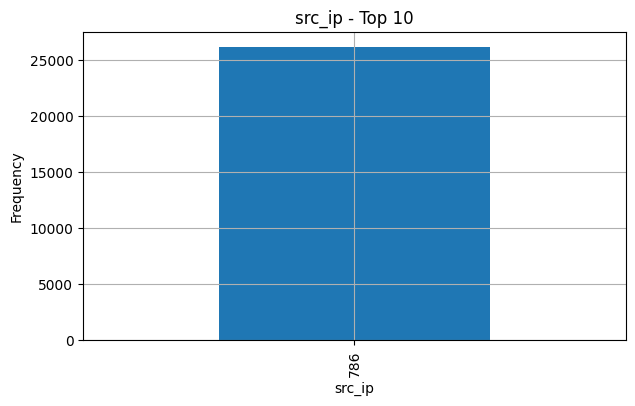

In [31]:
df_example.src_ip.value_counts()[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('src_ip - Top 10')
plt.grid()
plt.show()

In [32]:
df_example.dest_ip.value_counts()

dest_ip
786    26167
Name: count, dtype: int64

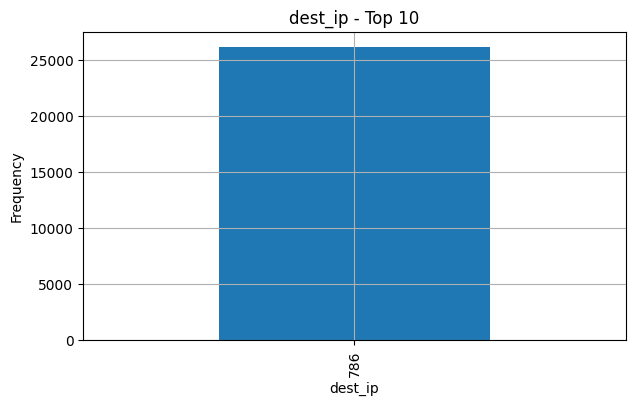

In [33]:
df_example.dest_ip.value_counts()[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('dest_ip - Top 10')
plt.grid()
plt.show()

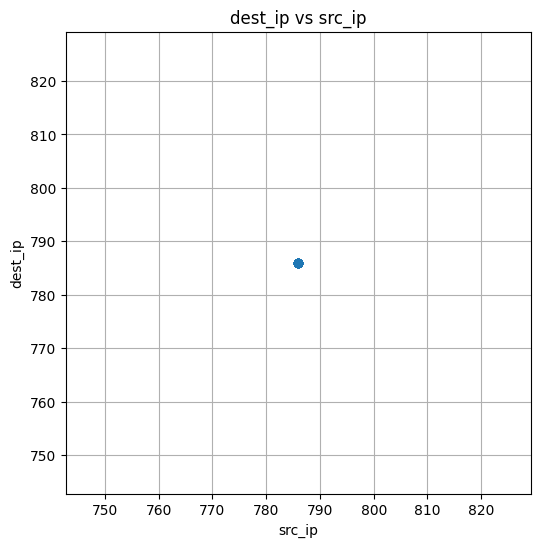

In [34]:
plt.figure(figsize=(6,6))
plt.scatter(df_example.src_ip, df_example.dest_ip, alpha=0.1)
plt.xlabel('src_ip')
plt.ylabel('dest_ip')
plt.title('dest_ip vs src_ip')
plt.grid()
plt.show()

In [35]:
df_example['IP_pair'] = df_example.src_ip.astype(str) + ' >> ' + df_example.dest_ip.astype(str)
df_example.IP_pair.value_counts()[0:20]

IP_pair
786 >> 786    26167
Name: count, dtype: int64

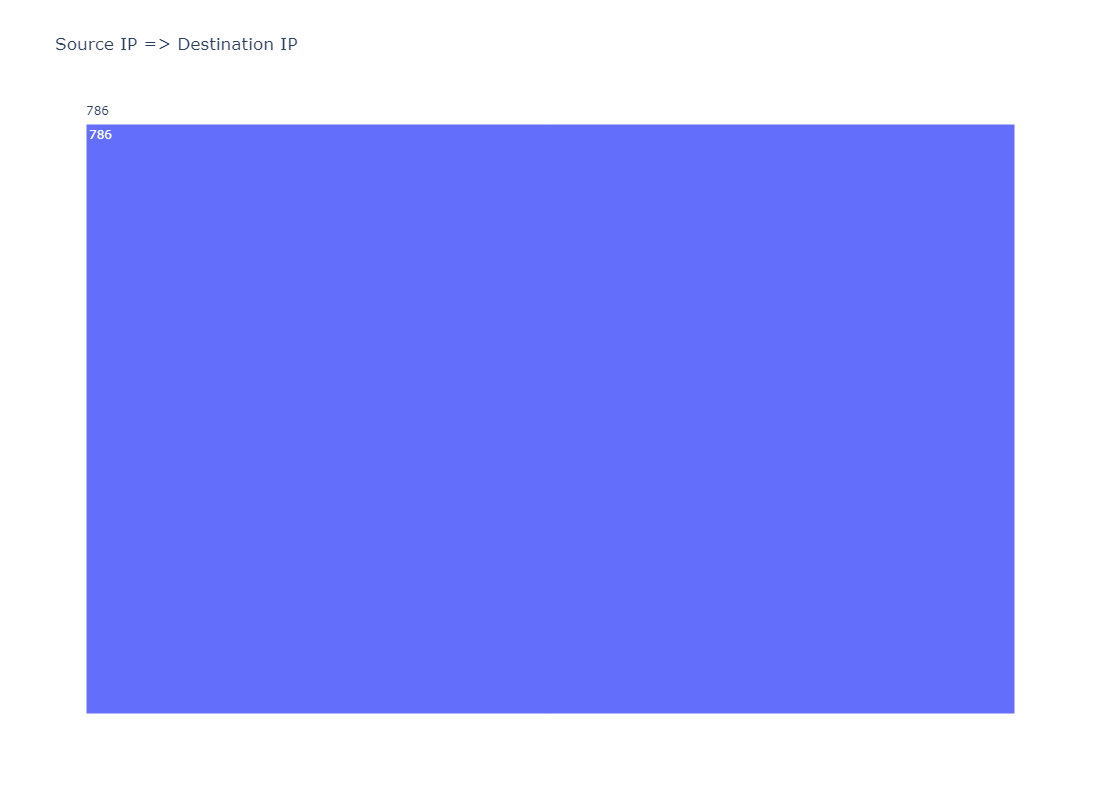

In [36]:
fig = px.treemap(df_example, path=['src_ip','dest_ip'], title='Source IP => Destination IP',
                 width=1000, height=800)
fig.show()

In [37]:
df_example.src_port.value_counts()

src_port
 47613    8560
-1        7448
 123       475
 50412     139
 50396     138
          ... 
 2168        1
 44258       1
 43248       1
 47920       1
 49872       1
Name: count, Length: 5061, dtype: int64

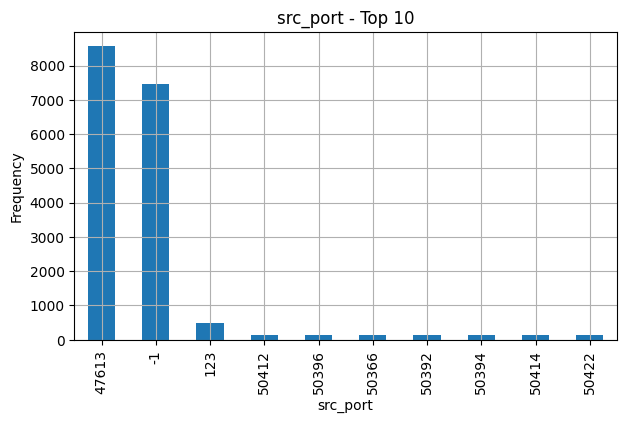

In [38]:
df_example.src_port.value_counts().iloc[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('src_port - Top 10')
plt.grid()
plt.show()

In [39]:
df_example.dest_port.value_counts()

dest_port
-1        7448
 5900     2823
 9200     2408
 22       1156
 123       475
          ... 
 13179       1
 25500       1
 25333       1
 35351       1
 17924       1
Name: count, Length: 7147, dtype: int64

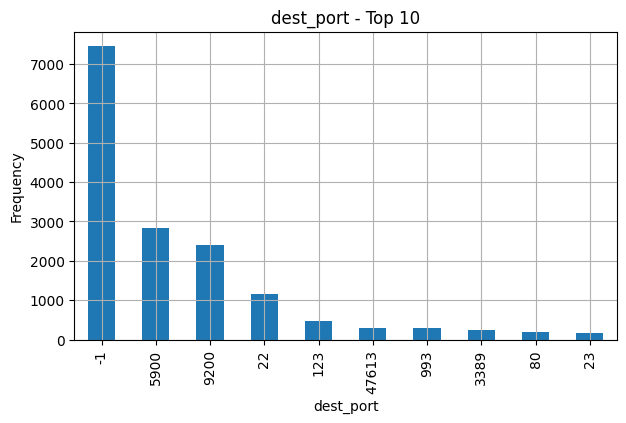

In [40]:
df_example.dest_port.value_counts().iloc[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('dest_port - Top 10')
plt.grid()
plt.show()

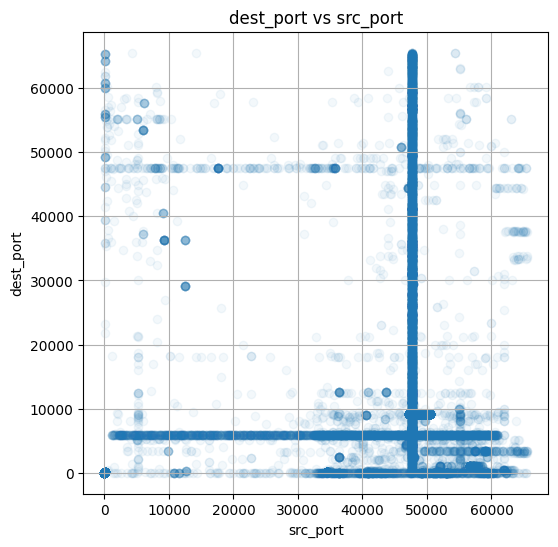

In [41]:
plt.figure(figsize=(6,6))
plt.scatter(df_example.src_port, df_example.dest_port, alpha=0.05)
plt.xlabel('src_port')
plt.ylabel('dest_port')
plt.title('dest_port vs src_port')
plt.grid()
plt.show()

In [42]:
df_example['port_pair'] = df_example.src_port.astype(str) + ' >> ' + df_example.dest_port.astype(str)
df_example.port_pair.value_counts()[0:20]

port_pair
-1 >> -1         7448
123 >> 123        475
50392 >> 9200     138
50412 >> 9200     138
50396 >> 9200     138
50366 >> 9200     137
50422 >> 9200     136
50394 >> 9200     136
50414 >> 9200     136
50398 >> 9200     135
68 >> 67          121
47302 >> 9200      51
47296 >> 9200      40
34562 >> 80        40
34564 >> 80        40
34566 >> 80        40
47310 >> 9200      35
47350 >> 9200      34
47264 >> 9200      31
47268 >> 9200      31
Name: count, dtype: int64

In [43]:
features = df_example.columns
features = features.drop(['label'])
features = list(features)
print(features)

['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy', 'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port', 'time_end', 'time_start', 'total_entropy', 'duration', 'IP_pair', 'port_pair']


In [44]:
h2o.init(max_mem_size='12G', nthreads=4)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.401-b10, mixed mode)
  Starting server from C:\Users\hp\AppData\Local\Programs\Python\Python39\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Temp\tmpmlydyhp3
  JVM stdout: C:\Temp\tmpmlydyhp3\h2o_hp_started_from_python.out
  JVM stderr: C:\Temp\tmpmlydyhp3\h2o_hp_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Asia/Kolkata
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    2 months and 20 days
H2O_cluster_name:           H2O_from_python_hp_4s8ar4
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    10.66 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  -----------------------------

In [45]:
t1 = time.time()
df_hex = h2o.H2OFrame(df_example)
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]:  3.68


In [46]:
target = 'label'
# explicitly convert target to categorical => classification problem
df_hex[target] = df_hex[target].asfactor()

In [47]:
train_hex, test_hex = df_hex.split_frame(ratios=[0.8], seed=999)

In [48]:
fit_DRF = H2ORandomForestEstimator(ntrees=10,
                                   max_depth=5,
                                   min_rows=10,
                                   nfolds=5,
                                   seed=999)

In [50]:
t1 = time.time()
fit_DRF.train(x=features,
              y=target,
              training_frame=train_hex)
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]:  4.68


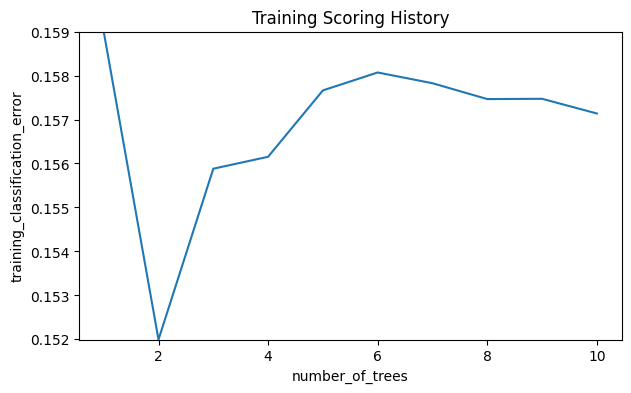

In [51]:
fit_DRF.plot()

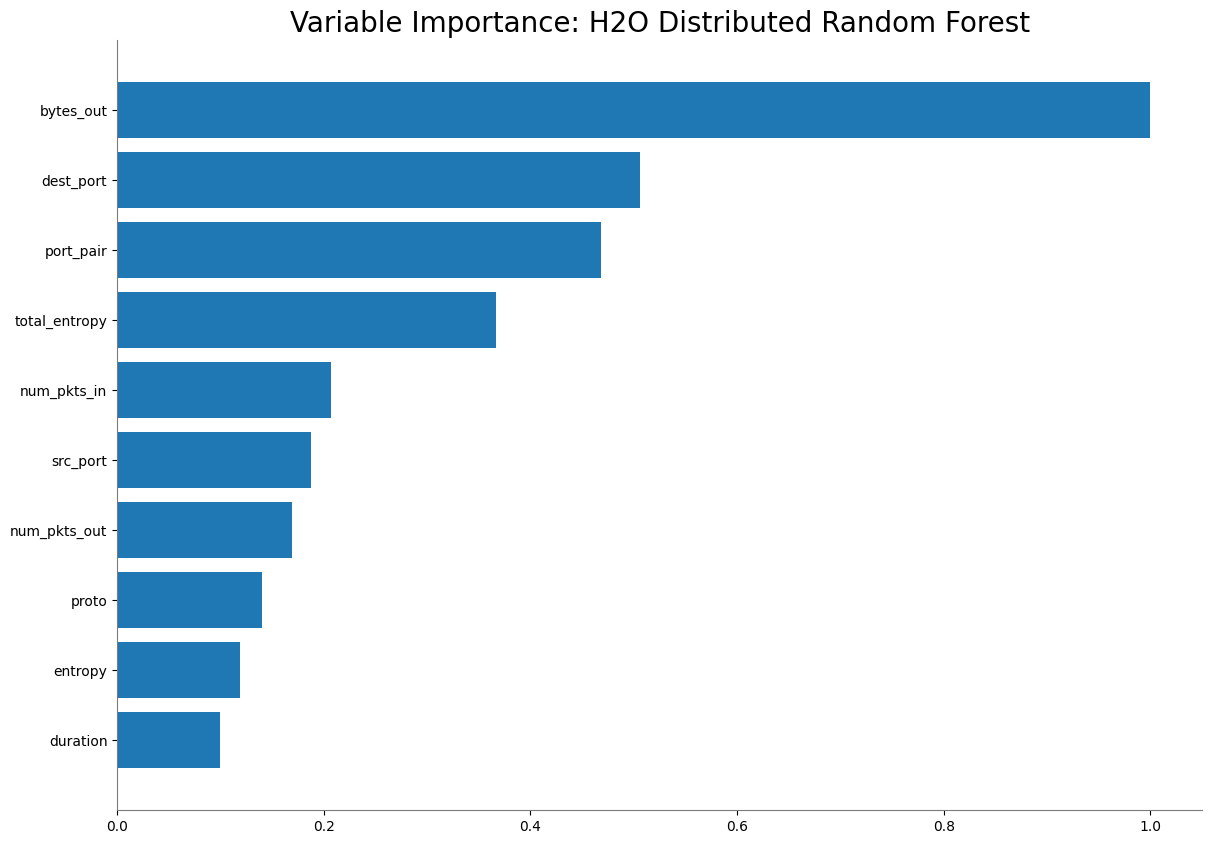

<Figure size 700x400 with 0 Axes>

In [52]:
fit_DRF.varimp_plot()

In [53]:
perf_train = fit_DRF.model_performance(train=True)
perf_train

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.08663842488140312
RMSE: 0.2943440586820178
LogLoss: 0.2543304278001378
Mean Per-Class Error: 0.14970240442045823
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
benign    malicious    outlier    Error      Rate
--------  -----------  ---------  ---------  --------------
1654      0            466        0.219811   466 / 2,120
1         2823         187        0.0624377  188 / 3,011
14        2600         13052      0.166858   2,614 / 15,666
1669      5423         13705      0.157138   3,268 / 20,797

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.842862
2    0.999327
3    1

In [54]:
fit_DRF.cross_validation_metrics_summary()

Cross-Validation Metrics Summary: 
                         mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.845356   0.00691375  0.834086      0.843555      0.848771      0.851335      0.849034
auc                      nan        0           nan           nan           nan           nan           nan
err                      0.154644   0.00691375  0.165914      0.156445      0.151229      0.148665      0.150966
err_count                650.6      28.0232     698           653           640           629           633
logloss                  0.254457   0.00999038  0.265202      0.255966      0.242063      0.24653       0.262523
max_per_class_error      0.223897   0.0298452   0.243182      0.241935      0.172446      0.223256      0.238663
mean_per_class_accuracy  0.858846   0.0142292   0.853808      0.859435      0.878051      0.839089      0.863846
mean_per_class_error     0.141154   0.0142292   0.146192      0.140565      0.121949      0.160911      0.136154
mse                      0.0866481  0.00366202  0.0909952     0.0865781     0.0821463     0.0840728     0.0894482
pr_auc                   nan        0           nan           nan           nan           nan           nan
r2                       0.799286   0.00755465  0.792401      0.800133      0.808144      0.804864      0.790884
rmse                     0.294308   0.00622354  0.301654      0.294242      0.286612      0.289953      0.299079

In [55]:
pred_test = fit_DRF.predict(test_hex)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [65]:
# Specify a different path for exporting the CSV file
csv_path = "C:/Temp/pred_test.csv"  # Specify the desired path and filename

# Export the predictions H2OFrame to a CSV file
h2o.export_file(pred_test, csv_path, force=True)

# Load the CSV file into a DataFrame
pred_test_csv = pd.read_csv(csv_path)

# Display the DataFrame
print(pred_test_csv.tail(10))

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
      predict    benign  malicious   outlier   target
5120  outlier  0.006601        0.0  0.993399  outlier
5121   benign  0.998414        0.0  0.001586   benign
5122  outlier  0.030235        0.0  0.969765  outlier
5123  outlier  0.006546        0.0  0.993454  outlier
5124  outlier  0.006546        0.0  0.993454  outlier
5125   benign  0.998415        0.0  0.001585   benign
5126  outlier  0.006546        0.0  0.993454  outlier
5127  outlier  0.006546        0.0  0.993454  outlier
5128  outlier  0.171018        0.0  0.828982  outlier
5129  outlier  0.053521        0.0  0.946479  outlier
